## PCA 
Jens Hahn  -  10/06/2021    
Data: [Food Texture - Kevin Dunn](https://openmv.net/info/food-texture)

### Load packages and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./food-texture.csv', index_col=0, header=0)

## Pairplot to get overview

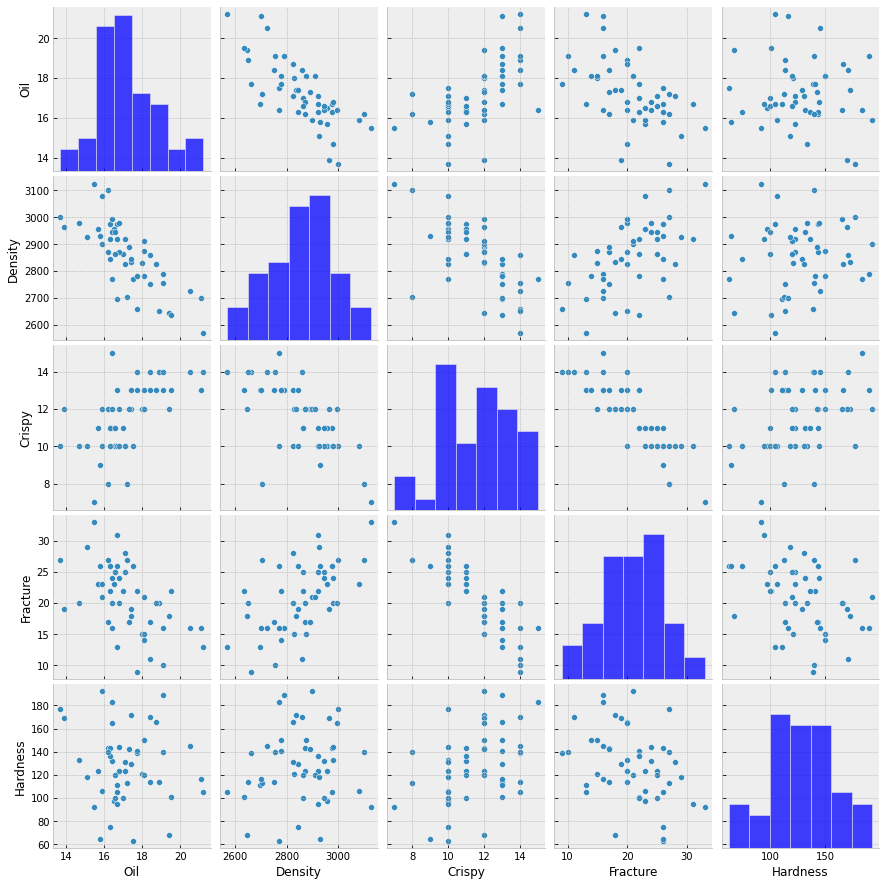

In [3]:
sns.pairplot(df)

### Normalize data

In [4]:
raw = df.copy()

In [5]:
scaler = StandardScaler()
df = scaler.fit_transform(raw)

In [6]:
df = pd.DataFrame(df, index=raw.index, columns=raw.columns)

In [7]:
df.shape

(50, 5)

In [8]:
df.head()

,Oil,Density,Crispy,Fracture,Hardness
B110,-0.445430,0.790272,-0.864754,0.395481,-1.011854
B136,0.315989,-1.603262,1.410914,-2.191776,0.351131
B171,-0.635784,0.100610,0.273080,-0.713344,0.480939
B192,-0.318527,0.506293,-0.864754,1.873913,-1.076758
B225,-0.572333,0.952546,-0.295837,0.949893,0.480939


In [9]:
a = np.random.normal(100, 5, 100)

In [10]:
cov_matrix = np.corrcoef(df, rowvar=False)

### Calculate covariance matrix

In [11]:
cov_matrix = np.cov(df, rowvar=False)

In [12]:
cov_matrix

array([[ 1.02040816, -0.7653306 ,  0.60519011, -0.5446318 , -0.09800532],
       [-0.7653306 ,  1.02040816, -0.68463877,  0.58380861,  0.11014   ],
       [ 0.60519011, -0.68463877,  1.02040816, -0.86118881,  0.41948306],
       [-0.5446318 ,  0.58380861, -0.86118881,  1.02040816, -0.380978  ],
       [-0.09800532,  0.11014   ,  0.41948306, -0.380978  ,  1.02040816]])

<AxesSubplot:>

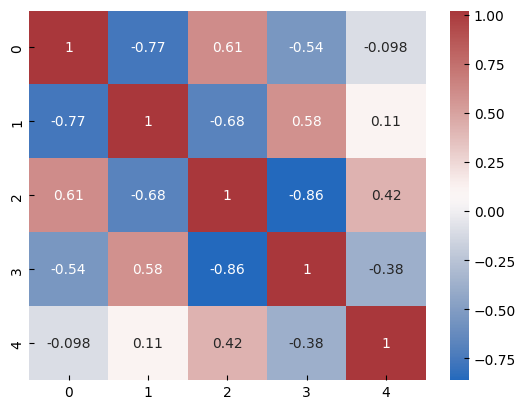

In [13]:
sns.heatmap(cov_matrix, cmap=sns.color_palette("vlag", as_cmap=True), annot=True)

Covariance matrix by hand

In [14]:
np.dot(df.values.T, df.values)/(50-1)

array([[ 1.02040816, -0.7653306 ,  0.60519011, -0.5446318 , -0.09800532],
       [-0.7653306 ,  1.02040816, -0.68463877,  0.58380861,  0.11014   ],
       [ 0.60519011, -0.68463877,  1.02040816, -0.86118881,  0.41948306],
       [-0.5446318 ,  0.58380861, -0.86118881,  1.02040816, -0.380978  ],
       [-0.09800532,  0.11014   ,  0.41948306, -0.380978  ,  1.02040816]])

### Calculate eigenvalues and eigenvectors

In [15]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [16]:
eigenvectors

array([[-0.01204121,  0.46794489, -0.6590302 ,  0.37043885, -0.45753343],
       [-0.35648161,  0.71846318, -0.01623973, -0.35674997,  0.4787455 ],
       [-0.79242064, -0.13252692,  0.17888443, -0.19766103, -0.53238767],
       [-0.44011646, -0.45693168, -0.54227938,  0.22123992,  0.50447688],
       [ 0.22614798, -0.19618432, -0.48923298, -0.8046661 , -0.15340262]])

Re-calculating the CoV matrix

In [23]:
np.dot(np.dot(eigenvectors, np.diag(eigenvalues)),eigenvectors.T)

array([[ 1.02040816, -0.7653306 ,  0.60519011, -0.5446318 , -0.09800532],
       [-0.7653306 ,  1.02040816, -0.68463877,  0.58380861,  0.11014   ],
       [ 0.60519011, -0.68463877,  1.02040816, -0.86118881,  0.41948306],
       [-0.5446318 ,  0.58380861, -0.86118881,  1.02040816, -0.380978  ],
       [-0.09800532,  0.11014   ,  0.41948306, -0.380978  ,  1.02040816]])

In [24]:
eigenvectors

array([[-0.01204121,  0.46794489, -0.6590302 ,  0.37043885, -0.45753343],
       [-0.35648161,  0.71846318, -0.01623973, -0.35674997,  0.4787455 ],
       [-0.79242064, -0.13252692,  0.17888443, -0.19766103, -0.53238767],
       [-0.44011646, -0.45693168, -0.54227938,  0.22123992,  0.50447688],
       [ 0.22614798, -0.19618432, -0.48923298, -0.8046661 , -0.15340262]])

Diagonalization of matrix (our goal!!)

In [25]:
np.cov(np.dot(df.values, eigenvectors), rowvar=False).round(10)

array([[ 0.12358331,  0.        ,  0.        ,  0.        , -0.        ],
       [ 0.        ,  0.24685723, -0.        ,  0.        ,  0.        ],
       [ 0.        , -0.        ,  0.31637688,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.32214874,  0.        ],
       [-0.        ,  0.        ,  0.        ,  0.        ,  3.09307466]])

### Sort eigenvalues by size

In [18]:
df.iloc[0,:], eigenvectors

(Oil        -0.445430
 Density     0.790272
 Crispy     -0.864754
 Fracture    0.395481
 Hardness   -1.011854
 Name: B110, dtype: float64,
 array([[-0.01204121,  0.46794489, -0.6590302 ,  0.37043885, -0.45753343],
        [-0.35648161,  0.71846318, -0.01623973, -0.35674997,  0.4787455 ],
        [-0.79242064, -0.13252692,  0.17888443, -0.19766103, -0.53238767],
        [-0.44011646, -0.45693168, -0.54227938,  0.22123992,  0.50447688],
        [ 0.22614798, -0.19618432, -0.48923298, -0.8046661 , -0.15340262]]))

Transformed data (all features/dimensions)

In [19]:
np.dot(df.values,eigenvectors)

array([[ 6.00854446e-03,  4.91750186e-01,  4.06598026e-01,
         6.25694634e-01,  1.39725427e+00],
       [ 4.93735538e-01, -2.58398309e-01,  1.08695130e+00,
        -3.57315833e-01, -2.82284799e+00],
       [ 1.78113439e-01, -2.98215110e-02,  6.17757348e-01,
        -8.70204208e-01, -2.39968216e-01],
       [-5.59646713e-01, -3.15703878e-01, -4.42393407e-01,
         1.15332817e+00,  1.95902981e+00],
       [-4.07546340e-01, -7.26336706e-02, -4.41603562e-01,
        -6.70200434e-01,  1.28080985e+00],
       [ 3.55452382e-01,  8.10744401e-02, -1.11271667e+00,
        -1.31153586e+00, -2.01773569e+00],
       [-1.55261417e-01,  3.31069783e-02,  2.75798330e-01,
         6.39075518e-01, -1.50329665e+00],
       [ 3.99273821e-02, -3.26631456e-01,  2.51967590e-01,
         2.40673743e+00,  8.37278653e-01],
       [-2.47887835e-01,  1.32878822e-02,  4.30108702e-01,
        -3.53736230e-01,  1.19718563e+00],
       [-2.39596998e-01,  2.10948012e-02, -1.04393719e-01,
        -3.54387605e-01

Sort the EV

In [23]:
sorted_index = np.argsort(eigenvalues)[::-1]

In [24]:
sorted_index

array([4, 3, 2, 1, 0])

In [25]:
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:,sorted_index]

In [26]:
sorted_eigenvalues

array([3.09307466, 1.32214874, 0.31637688, 0.24685723, 0.12358331])

In [27]:
sorted_eigenvectors

array([[-0.45753343,  0.37043885, -0.6590302 ,  0.46794489, -0.01204121],
       [ 0.4787455 , -0.35674997, -0.01623973,  0.71846318, -0.35648161],
       [-0.53238767, -0.19766103,  0.17888443, -0.13252692, -0.79242064],
       [ 0.50447688,  0.22123992, -0.54227938, -0.45693168, -0.44011646],
       [-0.15340262, -0.8046661 , -0.48923298, -0.19618432,  0.22614798]])

### Select eigenvectors (Percentage Variance Explained)

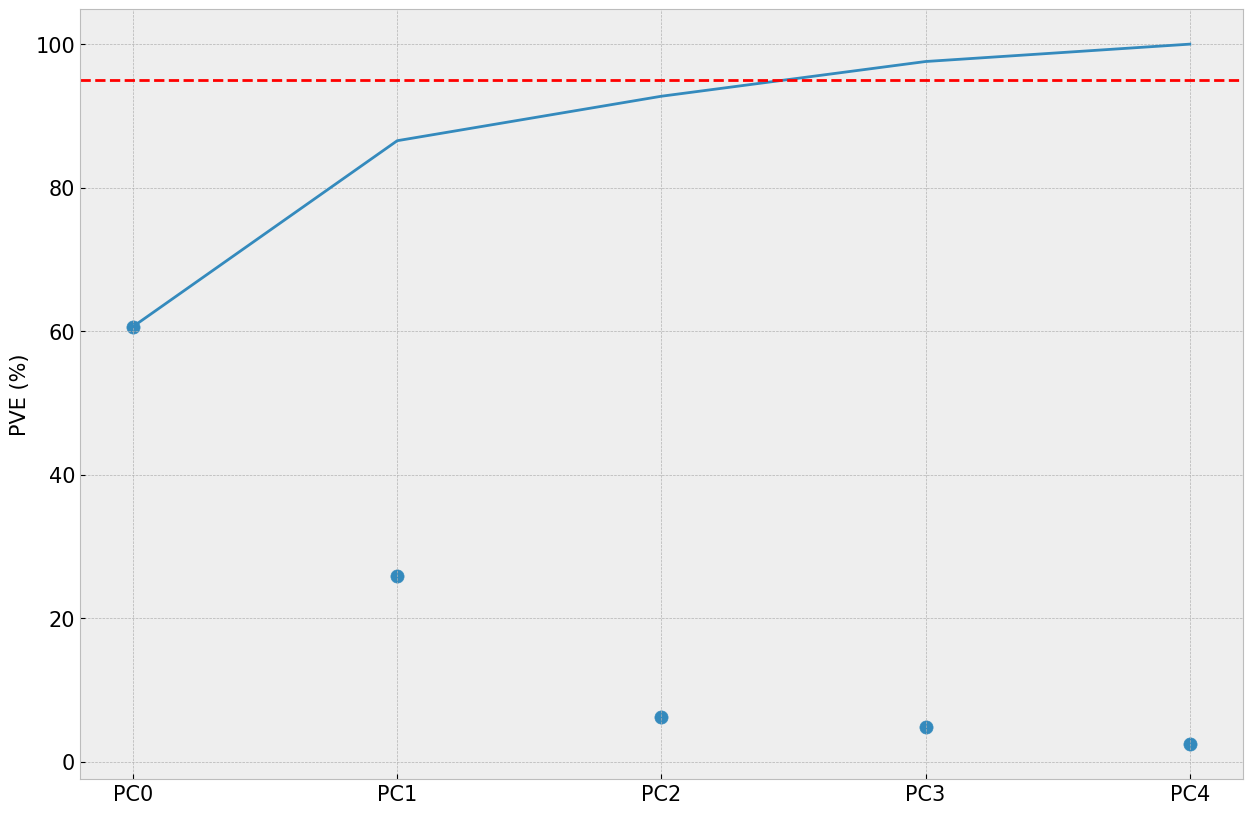

In [28]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(range(5), sorted_eigenvalues/np.sum(sorted_eigenvalues)*100, s=90)
ax.plot(range(5), [sorted_eigenvalues[0:i+1].sum()/np.sum(sorted_eigenvalues) * 100 for i, _ in enumerate(sorted_eigenvalues)])
ax.set_xticks(range(5))
ax.axhline(95, c='r', ls='--')
ax.set_xticklabels([f'PC{i}' for i in range(5)])
ax.set_ylabel('PVE (%)', fontsize=15)
ax.tick_params('both', labelsize=15)

### Calculate loadings

In [29]:
loadings = sorted_eigenvectors*np.sqrt(sorted_eigenvalues)

In [30]:
loadings

array([[-0.80467041,  0.4259481 , -0.37068728,  0.23249715, -0.00423302],
       [ 0.84197637, -0.41020798, -0.00913442,  0.35696648, -0.12531903],
       [-0.9363176 , -0.22727999,  0.10061782, -0.06584564, -0.27857086],
       [ 0.88723051,  0.25439211, -0.30501799, -0.22702527, -0.15472038],
       [-0.26979132, -0.92524312, -0.27518078, -0.09747364,  0.07950101]])

In [31]:
np.linalg.norm(loadings[0,:])

1.0101525445522106

### Chose number of components (2 for 2-dimensional plot)

In [34]:
n_components = 2 # you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [35]:
eigenvector_subset

array([[-0.45753343,  0.37043885],
       [ 0.4787455 , -0.35674997],
       [-0.53238767, -0.19766103],
       [ 0.50447688,  0.22123992],
       [-0.15340262, -0.8046661 ]])

### Get data along PC1 and PC2
data[50x5] x EV[5x2]

In [36]:
X_reduced = np.dot(df,eigenvector_subset)

In [37]:
eigenvalues

array([0.12358331, 0.24685723, 0.31637688, 1.32214874, 3.09307466])

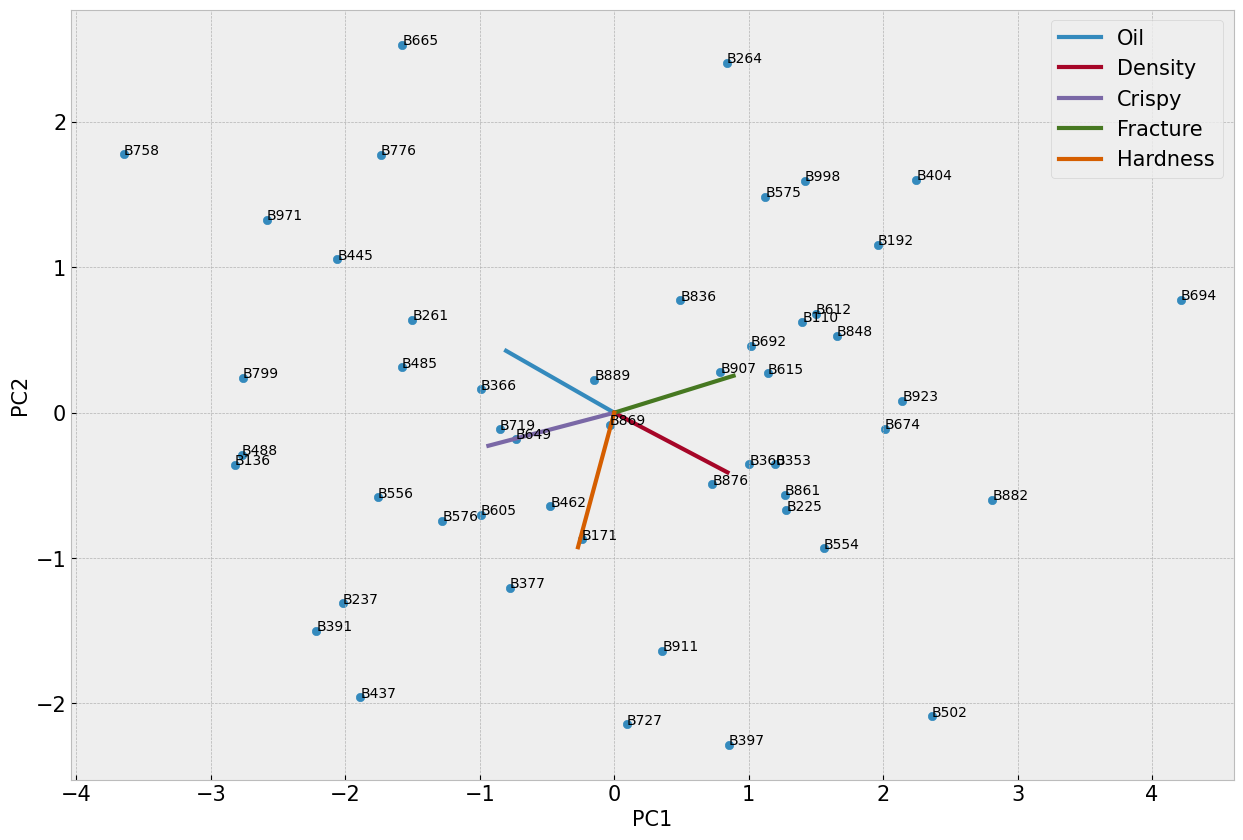

In [38]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(X_reduced[:,0], X_reduced[:,1])
ax.plot([0, loadings[0,0]], [0, loadings[0,1]], lw=3, label='Oil')
ax.plot([0, loadings[1,0]], [0, loadings[1,1]], lw=3, label='Density')
ax.plot([0, loadings[2,0]], [0, loadings[2,1]], lw=3, label='Crispy')
ax.plot([0, loadings[3,0]], [0, loadings[3,1]], lw=3, label='Fracture')
ax.plot([0, loadings[4,0]], [0, loadings[4,1]], lw=3, label='Hardness')
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
for i in range(df.shape[0]):
    plt.text(X_reduced[i,0], X_reduced[i,1], str(df.index[i]))
ax.legend(fontsize=15)
ax.tick_params('both', labelsize=15)

### PCA with scikit learn

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2)

In [44]:
pca.fit(df)

PCA(n_components=2)

In [45]:
print(pca.explained_variance_ratio_)

[0.60624263 0.25914115]


In [46]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

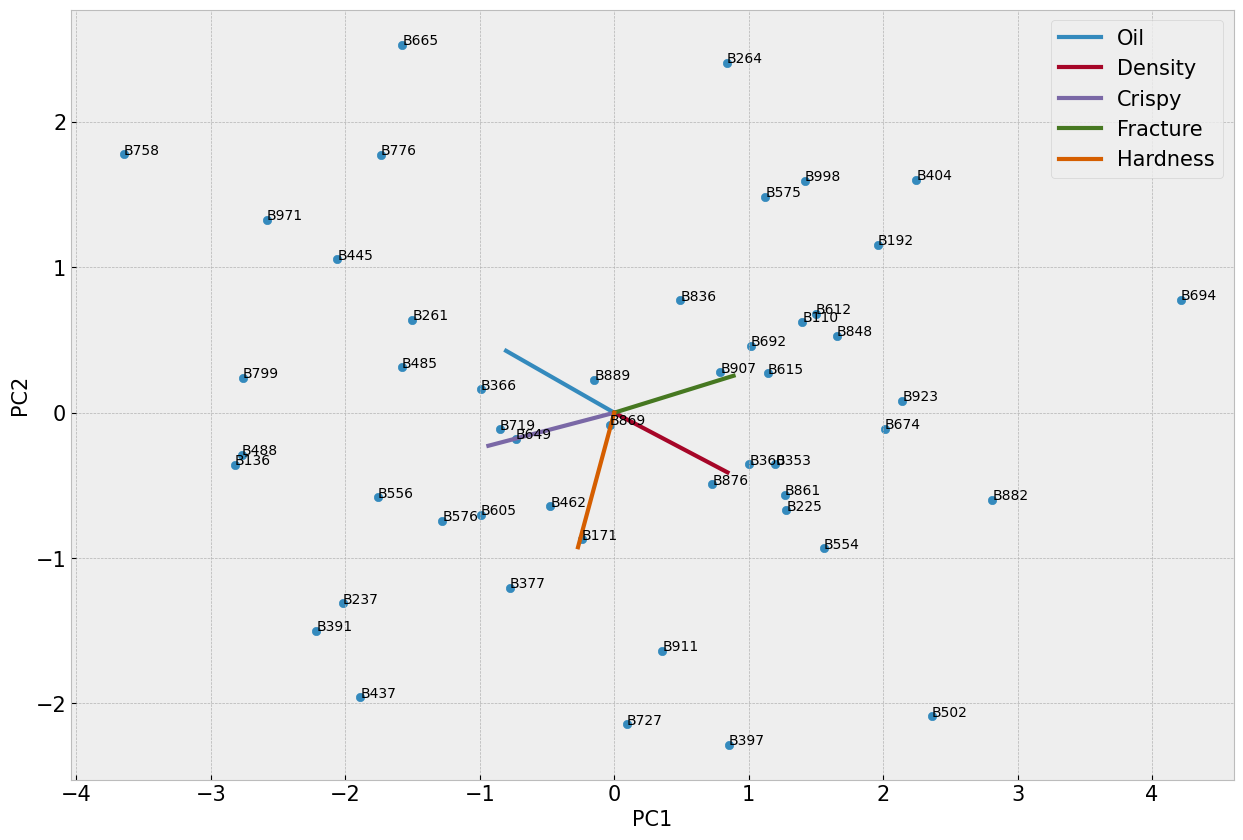

In [47]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(pca.transform(df)[:,0], pca.transform(df)[:,1])
ax.plot([0, loadings[0,0]], [0, loadings[0,1]], lw=3, label='Oil')
ax.plot([0, loadings[1,0]], [0, loadings[1,1]], lw=3, label='Density')
ax.plot([0, loadings[2,0]], [0, loadings[2,1]], lw=3, label='Crispy')
ax.plot([0, loadings[3,0]], [0, loadings[3,1]], lw=3, label='Fracture')
ax.plot([0, loadings[4,0]], [0, loadings[4,1]], lw=3, label='Hardness')
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
for i in range(df.shape[0]):
    plt.text(X_reduced[i,0], X_reduced[i,1], str(df.index[i]))
ax.legend(fontsize=15)
ax.tick_params('both', labelsize=15)